# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will predict the network attack that is happening over the network using the above mentioned dataset. 

The type of attacks investigated are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

In [118]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from  matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

Reading the Dataset csv using the link of another git hub repo. 

In [119]:
from google.colab import files
uploaded = files.upload()

In [120]:
train = pd.read_csv('UNSW_NB15_testing-set.csv')
test = pd.read_csv('UNSW_NB15_training-set.csv')
df = train.append(test)


In [121]:
df.shape

(257673, 45)

#**Prepare the dataset**

---



# Dropping unnecessary columns

One such column is 'id'

In [122]:
df = df.drop(['id'],axis=1)
test = test.drop(['id','attack_cat'],axis=1)
train = train.drop(['id','attack_cat'],axis=1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [123]:
df = df.reset_index(drop=True)

# Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [124]:
# checking for null values
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

Check what all network attacks are identified by the dataset

In [125]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [126]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [127]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(df[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [128]:
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])

In [129]:
df['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [130]:
df['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [131]:
# removing all the "-" and replacing those with "None"
df['service'] = df['service'].apply(lambda x:"None" if x=="-" else x)

In [132]:
df['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [133]:
# df = df.drop(columns=['attack_cat'])

In [134]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

# Label encoding



In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. 

So we have to convert categorical columns to numerical columns in some way. We will use one hot encoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [135]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in train.columns:
    if train[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))

#More EDA can be seen here: https://github.com/divyaKh/CMPE255Project/blob/main/2.EDA/Exploratory_Data_Analysis.ipynb

In [136]:
test.shape

(82332, 43)

#Plot lables

#Feature importances on combined dataset



Feature importance using Tree based classifier. 




#**CART classification**

In [137]:
from sklearn.tree import DecisionTreeClassifier
combine = pd.DataFrame()
importance_dict = pd.DataFrame()
combine = train.append(test)
clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
y=combine['label']
clf.fit(X, y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



0     0.006506
1     0.001610
2     0.002617
3     0.000611
4     0.005686
5     0.003100
6     0.037685
7     0.017365
8     0.007189
9     0.537624
10    0.000180
11    0.010849
12    0.008630
13    0.002467
14    0.000410
15    0.009932
16    0.006064
17    0.006687
18    0.007683
19    0.000008
20    0.009871
21    0.010480
22    0.000000
23    0.009095
24    0.066283
25    0.008424
26    0.065729
27    0.011334
28    0.004002
29    0.003075
30    0.018331
31    0.000395
32    0.005093
33    0.003918
34    0.003375
35    0.037104
36    0.000091
37    0.000048
38    0.001104
39    0.007401
40    0.061941
41    0.000000
Name: combined, dtype: float64

Feature: 0, Score: 0.00673
Feature: 1, Score: 0.00169
Feature: 2, Score: 0.00259
Feature: 3, Score: 0.00055
Feature: 4, Score: 0.00580
Feature: 5, Score: 0.00319
Feature: 6, Score: 0.03701
Feature: 7, Score: 0.01859
Feature: 8, Score: 0.00686
Feature: 9, Score: 0.53777
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.01070
Feature: 12, Score: 0.00872
Feature: 13, Score: 0.00228
Feature: 14, Score: 0.00043
Feature: 15, Score: 0.00945
Feature: 16, Score: 0.00602
Feature: 17, Score: 0.00691
Feature: 18, Score: 0.00686
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01020
Feature: 21, Score: 0.01074
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00873
Feature: 24, Score: 0.06681
Feature: 25, Score: 0.00878
Feature: 26, Score: 0.06656
Feature: 27, Score: 0.01015
Feature: 28, Score: 0.00103
Feature: 29, Score: 0.00300
Feature: 30, Score: 0.01802
Feature: 31, Score: 0.00029
Feature: 32, Score: 0.00529
Feature: 33, Score: 0.00415
Feature: 34, Score: 0.00341
Feature: 35, Score: 0.03684
Fe

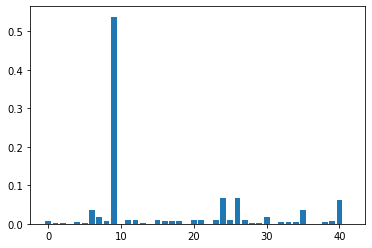

In [138]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [204]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,119,0,5,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,1.106101,113,0,4,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


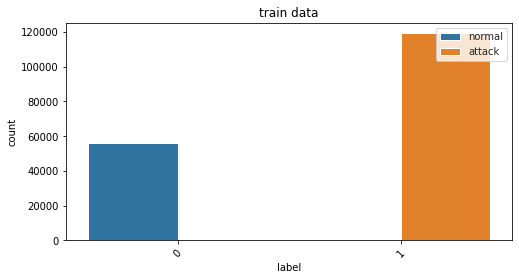

In [209]:
import seaborn as sns
combine['label'].nunique()
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
col_countplot('label')

In [140]:
combine.shape

(257673, 43)

#Preprocessing : 

In [141]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [142]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

**Appying PCA reduces the number of features to 27**

In [143]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [144]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [145]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [146]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)
X = pd.DataFrame(X, columns =['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'])

X_mm.shape

Apply MinMax scaler


(257673, 42)

In [147]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


In [148]:
X_ss=combine.drop(columns='label')    
y_ss=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_ss = applyStandardScaler(X_ss)

Apply Standard scaler


In [149]:
X_ss_corr=combine.drop(columns='label')    
y_ss_corr=combine['label']
n_com=0.99
cols = X_ss_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_ss_corr = applyStandardScaler(X_ss_corr)
X_ss_corr = pd.DataFrame(X_ss_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_ss_corr)
print(col)
X_ss_corr.drop(X_ss_corr[col], axis=1, inplace=True)
X_ss_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss', 'ct_ftp_cmd']
['sloss', 'dloss', 'ct_ftp_cmd']


(257673, 39)

Observations: 3 columns have been pruned due to high correlation with other features, other than target.

In [150]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
cols = X_mm_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss', 'ct_ftp_cmd']
['sloss', 'dloss', 'ct_ftp_cmd']


(257673, 39)

In [151]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply MinMax scaler
29


(257673, 29)

OBSERVATION: After apply PCA the features got reduces to 29. That means that number of features that capures 99% variance has been reduced to 29 from 42.

**XGBoost**



In [223]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import time

X= X
y= y
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27789
           1       0.95      0.95      0.95     49513

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25329  2460]
 [ 2692 46821]]
XGBoost model accuracy score: 0.9334
f1_score: 0.9478510840739316
Time taken to complete:
29.37979190399983


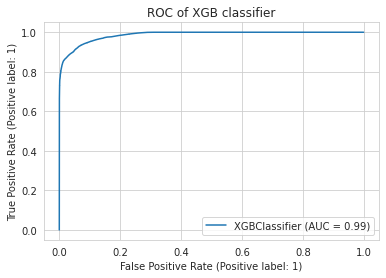

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27814
           1       0.95      0.95      0.95     49488

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25367  2447]
 [ 2713 46775]]
XGBoost model accuracy score: 0.9332
f1_score: 0.9477256610272516
Time taken to complete:
29.16838524500008


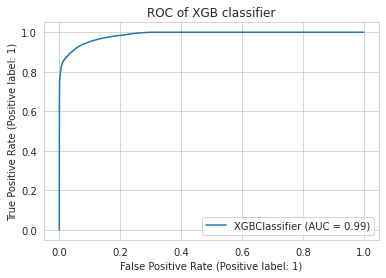

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27703
           1       0.95      0.95      0.95     49599

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25260  2443]
 [ 2633 46966]]
XGBoost model accuracy score: 0.9343
f1_score: 0.9487314156431804
Time taken to complete:
29.151484448000247


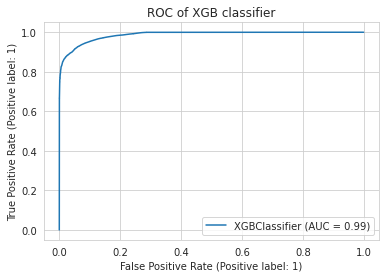

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27846
           1       0.95      0.95      0.95     49456

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25253  2593]
 [ 2555 46901]]
XGBoost model accuracy score: 0.9334
f1_score: 0.9479737241030824
Time taken to complete:
29.422868876999928


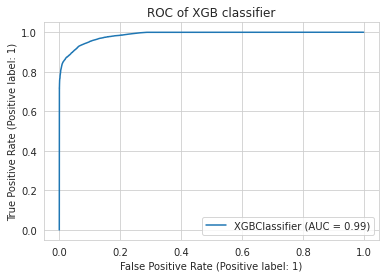

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27960
           1       0.95      0.95      0.95     49342

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25445  2515]
 [ 2706 46636]]
XGBoost model accuracy score: 0.9325
f1_score: 0.9469911567319506
Time taken to complete:
29.172549422999964


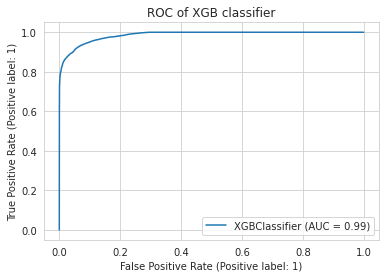

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27894
           1       0.95      0.95      0.95     49408

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25469  2425]
 [ 2683 46725]]
XGBoost model accuracy score: 0.9339
f1_score: 0.9481726496073379
Time taken to complete:
28.97656648999964


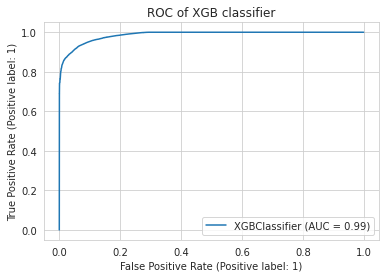

-----------------------------------------------------------------------------------------------------------------


ValueError: ignored

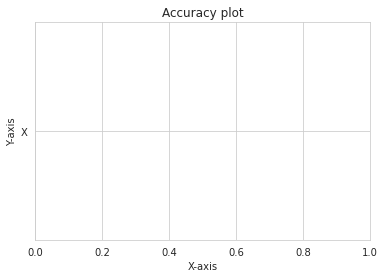

In [227]:
acc=[]
f1=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  start = time.process_time()
  # your code here
  
  print("X=",dataset[i])
  print("y=",j[i])
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = xgb.XGBClassifier()
  model.fit(X_train, y_train)
  predicted_xgb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_xgb_y))
  print(metrics.confusion_matrix(y_test, predicted_xgb_y))
  print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_y)))
  acc = accuracy_score(y_test, predicted_xgb_y)
  f1=f1_score(y_test, predicted_xgb_y)
  print("f1_score:",f1)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")
import matplotlib.pyplot as plt
x = acc
y = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Accuracy plot")
for i in range(len(y)):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%i)
plt.legend()
plt.show()

**OBSERVATION: The best accuracy for XGBoost is for Standard scaling and correlation analysis. The F1 score is also good for the same**

**GB Gradient**

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28073
           1       0.94      0.95      0.95     49229

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25220  2853]
 [ 2387 46842]]
Gradient model accuracy score: 0.9322
f1_score: 0.6365232927609206
Time taken to complete:
124.18794642499961


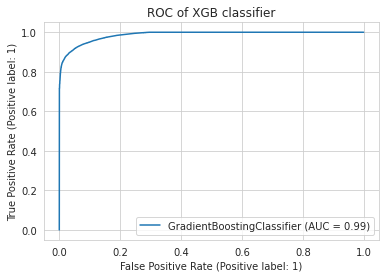

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27734
           1       0.94      0.95      0.95     49568

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24928  2806]
 [ 2371 47197]]
Gradient model accuracy score: 0.9330
f1_score: 0.6384881532889545
Time taken to complete:
217.67517536600008


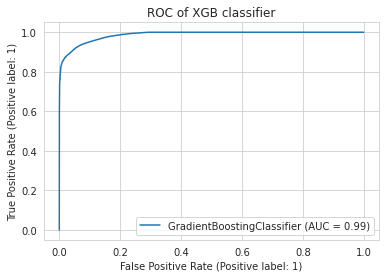

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28013
           1       0.94      0.95      0.95     49289

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25241  2772]
 [ 2345 46944]]
Gradient model accuracy score: 0.9338
f1_score: 0.6383272291943551
Time taken to complete:
311.52139805499974


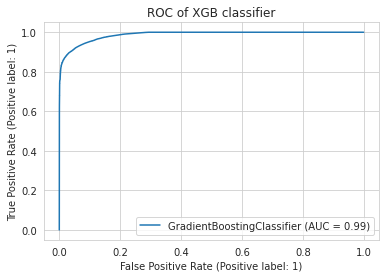

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28034
           1       0.94      0.95      0.95     49268

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25287  2747]
 [ 2433 46835]]
Gradient model accuracy score: 0.9330
f1_score: 0.6356828283238285
Time taken to complete:
405.3360456579994


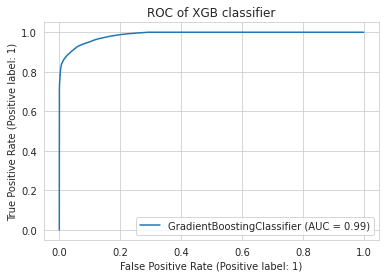

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27875
           1       0.94      0.95      0.95     49427

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25113  2762]
 [ 2401 47026]]
Gradient model accuracy score: 0.9332
f1_score: 0.6375360923965352
Time taken to complete:
498.9746722330001


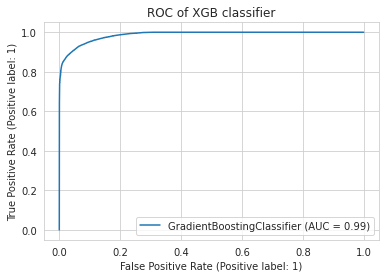

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27875
           1       0.94      0.95      0.95     49427

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25063  2812]
 [ 2418 47009]]
Gradient model accuracy score: 0.9323
f1_score: 0.638832885872043
Time taken to complete:
592.8678473089994


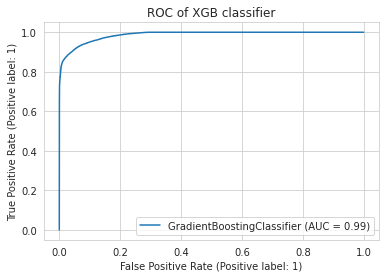

-----------------------------------------------------------------------------------------------------------------


In [228]:
acc1=[]
f2=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = GradientBoostingClassifier()
  model.fit(X_train, y_train)
  predicted_gb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_gb_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  print('Gradient model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_y)))
  acc1 = accuracy_score(y_test, predicted_gb_y)
  f2=f1_score(y_test, predicted_dt_y)
  print("f1_score:",f2)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

**Decision trees**

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27858
           1       0.95      0.95      0.95     49444

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25482  2376]
 [ 2481 46963]]
Decision trees model accuracy score: 0.9372
f1_score: 0.9508316208254457
Time taken to complete:
636.3999181889994


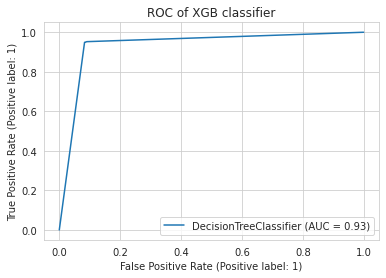

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27957
           1       0.95      0.95      0.95     49345

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25544  2413]
 [ 2459 46886]]
Decision trees model accuracy score: 0.9370
f1_score: 0.9506102753335226
Time taken to complete:
640.284866125


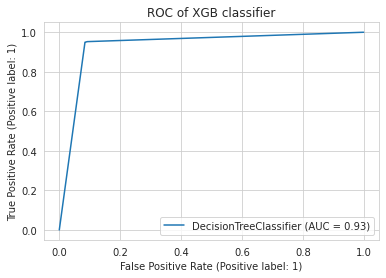

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27888
           1       0.95      0.95      0.95     49414

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25444  2444]
 [ 2467 46947]]
Decision trees model accuracy score: 0.9365
f1_score: 0.9502960376499164
Time taken to complete:
644.1349306909997


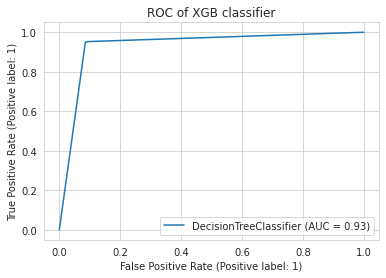

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27755
           1       0.95      0.95      0.95     49547

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25250  2505]
 [ 2562 46985]]
Decision trees model accuracy score: 0.9345
f1_score: 0.9488373032301061
Time taken to complete:
648.0837303409999


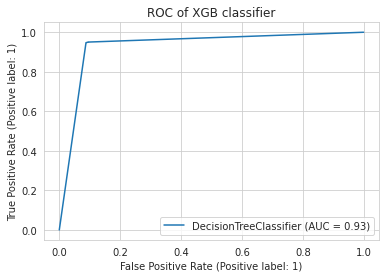

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27911
           1       0.95      0.95      0.95     49391

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25510  2401]
 [ 2518 46873]]
Decision trees model accuracy score: 0.9364
f1_score: 0.9501444281153398
Time taken to complete:
651.9058460059996


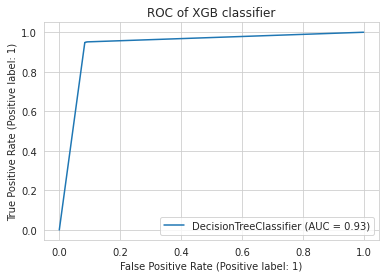

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28003
           1       0.95      0.95      0.95     49299

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25577  2426]
 [ 2514 46785]]
Decision trees model accuracy score: 0.9361
f1_score: 0.9498528068216424
Time taken to complete:
655.7025938400002


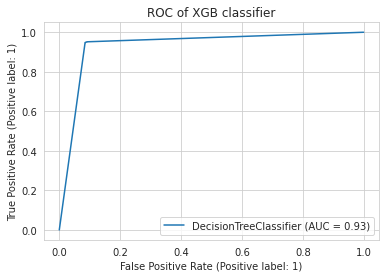

-----------------------------------------------------------------------------------------------------------------


In [230]:
acc2=[]
f3=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  predicted_dt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_dt_y))
  print(metrics.confusion_matrix(y_test, predicted_dt_y))
  print('Decision trees model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_y)))
  acc2 = accuracy_score(y_test, predicted_dt_y)
  f3=f1_score(y_test, predicted_dt_y)
  print("f1_score:",f3)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

**Random forest**

In [231]:
acc3=[]
f4=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  predicted_rt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_rt_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  print('Random Forest model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_y)))
  acc3 = accuracy_score(y_test, predicted_rt_y)
  f4=f1_score(y_test, y_test, predicted_rt_y)
  print("f1_score:",f4)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27895
           1       0.96      0.96      0.96     49407

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9856 18039]
 [17625 31782]]
Random Forest model accuracy score: 0.9509


TypeError: ignored

================================================================================================================================================================


In [154]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_y)))
accuracy1 = accuracy_score(y_test, predicted_xgb_y)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27774
           1       0.95      0.95      0.95     49528

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25275  2499]
 [ 2571 46957]]
XGBoost model accuracy score: 0.9344


GB

In [155]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Gradient model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_y)))
accuracy2 = accuracy_score(y_test, predicted_gb_y)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27774
           1       0.95      0.95      0.95     49528

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25042  2732]
 [ 2392 47136]]
Gradient model accuracy score: 0.9337


DT

In [156]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_dt_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_y))
print(metrics.confusion_matrix(y_test, predicted_dt_y))
print('Decision trees model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_y)))
accuracy3 = accuracy_score(y_test, predicted_dt_y)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     27774
           1       0.83      1.00      0.91     49528

    accuracy                           0.87     77302
   macro avg       0.92      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[17856  9918]
 [    0 49528]]
Decision trees model accuracy score: 0.8717


RT

In [157]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_rt_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Random Forest model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_y)))
accuracy4 = accuracy_score(y_test, predicted_rt_y)

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     27774
           1       0.83      1.00      0.91     49528

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.84     77302
weighted avg       0.89      0.87      0.86     77302

[[25042  2732]
 [ 2392 47136]]
Random Forest model accuracy score: 0.8699


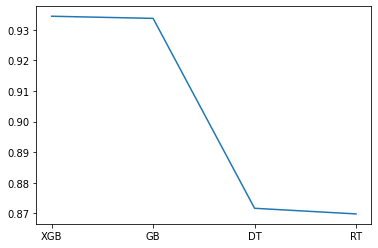

In [158]:
import matplotlib.pyplot as plt
plt.plot(["XGB","GB","DT","RT"],[accuracy1, accuracy2, accuracy3, accuracy4])

plt.show()


**WITH PCA AND STANDARD SCALER**

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3)

XGB

In [161]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_pca_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_pca_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_pca_y)))
accuracy1 = accuracy_score(y_test, predicted_xgb_pca_y)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     27893
           1       0.90      0.96      0.93     49409

    accuracy                           0.91     77302
   macro avg       0.91      0.88      0.89     77302
weighted avg       0.91      0.91      0.90     77302

[[22346  5547]
 [ 1787 47622]]
XGBoost model accuracy score: 0.9051


GB 

In [162]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_pca_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Gradient  model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_pca_y)))
accuracy2 = accuracy_score(y_test, predicted_gb_pca_y)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     27893
           1       0.90      0.96      0.93     49409

    accuracy                           0.91     77302
   macro avg       0.91      0.89      0.90     77302
weighted avg       0.91      0.91      0.91     77302

[[ 9954 17939]
 [17480 31929]]
Gradient  model accuracy score: 0.9074


DT

In [163]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_dt_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_pca_y))
print(metrics.confusion_matrix(y_test, predicted_dt_pca_y))
print('Decison trees model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_pca_y)))
accuracy3 = accuracy_score(y_test, predicted_dt_pca_y)

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     27893
           1       0.84      0.98      0.91     49409

    accuracy                           0.87     77302
   macro avg       0.90      0.83      0.85     77302
weighted avg       0.89      0.87      0.87     77302

[[18951  8942]
 [  824 48585]]
Decison trees model accuracy score: 0.8737


RT

In [164]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_rt_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_pca_y))
print(metrics.confusion_matrix(y_test, predicted_gb_pca_y))
print('Random Forest model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_pca_y)))
accuracy4 = accuracy_score(y_test, predicted_rt_pca_y)

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     27893
           1       0.82      1.00      0.90     49409

    accuracy                           0.85     77302
   macro avg       0.90      0.80      0.82     77302
weighted avg       0.88      0.85      0.84     77302

[[22678  5215]
 [ 1946 47463]]
Random Forest model accuracy score: 0.8532


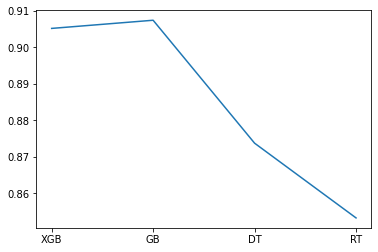

In [165]:
import matplotlib.pyplot as plt
plt.plot(["XGB","GB","DT","RT"],[accuracy1, accuracy2, accuracy3, accuracy4])

plt.show()

**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_mm_corr, y_mm_corr, test_size=0.3)

XGB

In [167]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_mm_corr_y)))
accuracy1 = accuracy_score(y_test, predicted_xgb_mm_corr_y)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27739
           1       0.95      0.95      0.95     49563

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25153  2586]
 [ 2589 46974]]
XGBoost model accuracy score: 0.9331


GB

In [168]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_mm_corr_y)))
accuracy2 = accuracy_score(y_test, predicted_gb_mm_corr_y)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27739
           1       0.94      0.95      0.95     49563

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24895  2844]
 [ 2343 47220]]
XGBoost model accuracy score: 0.9329


DT

In [169]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_dt_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_y))
print(metrics.confusion_matrix(y_test, predicted_dt_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_corr_y)))
accuracy3 = accuracy_score(y_test, predicted_dt_corr_y)

              precision    recall  f1-score   support

           0       0.35      0.23      0.28     27739
           1       0.64      0.77      0.70     49563

    accuracy                           0.57     77302
   macro avg       0.50      0.50      0.49     77302
weighted avg       0.54      0.57      0.55     77302

[[ 6324 21415]
 [11532 38031]]
XGBoost model accuracy score: 0.8742


RT

In [170]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_rt_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_mm_corr_y)))
accuracy4 =accuracy_score(y_test, predicted_rt_mm_corr_y)

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     27739
           1       0.84      0.99      0.91     49563

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[24895  2844]
 [ 2343 47220]]
XGBoost model accuracy score: 0.8703


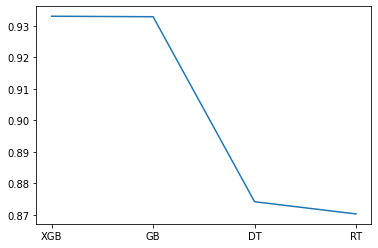

In [171]:
import matplotlib.pyplot as plt
plt.plot(["XGB","GB","DT","RT"],[accuracy1, accuracy2, accuracy3, accuracy4])

plt.show()

**WITH MINMAX SCALING**



In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, y_mm, test_size=0.3)

XGB

In [173]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_mm_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_mm_y)))
accuracy1 = accuracy_score(y_test, predicted_xgb_mm_y)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27985
           1       0.95      0.95      0.95     49317

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25410  2575]
 [ 2552 46765]]
XGBoost model accuracy score: 0.9337


GB

In [174]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_mm_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_mm_y)))
accuracy2 = accuracy_score(y_test, predicted_gb_mm_y)


              precision    recall  f1-score   support

           0       0.92      0.89      0.91     27985
           1       0.94      0.96      0.95     49317

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25027  2958]
 [ 2201 47116]]
XGBoost model accuracy score: 0.9333


DT

In [175]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_dt_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_mm_y))
print(metrics.confusion_matrix(y_test, predicted_dt_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_mm_y)))
accuracy3 = accuracy_score(y_test, predicted_dt_mm_y)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     27985
           1       0.83      1.00      0.91     49317

    accuracy                           0.87     77302
   macro avg       0.92      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[18035  9950]
 [    0 49317]]
XGBoost model accuracy score: 0.8713


RT

In [176]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_rt_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_mm_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_mm_y)))
accuracy4 = accuracy_score(y_test, predicted_rt_mm_y)

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     27985
           1       0.83      1.00      0.91     49317

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.84     77302
weighted avg       0.89      0.87      0.86     77302

[[25027  2958]
 [ 2201 47116]]
XGBoost model accuracy score: 0.8696


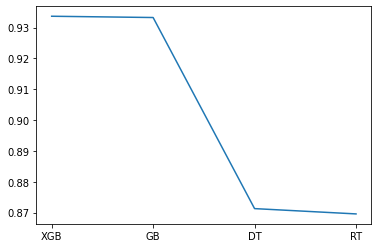

In [177]:
import matplotlib.pyplot as plt
plt.plot(["XGB","GB","DT","RT"],[accuracy1, accuracy2, accuracy3, accuracy4])

plt.show()

Final: Multi class classification.